In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
   
def get_skin_depth(rho,frequency=671111):
    return (rho/(4e-7*np.pi * np.pi *frequency))**.5

Check the relationship between skin depth and the analytical solution

2.541194636105469
2.5411937454904123
2.541195184210939
2.541195364012048
2.5411952663739643


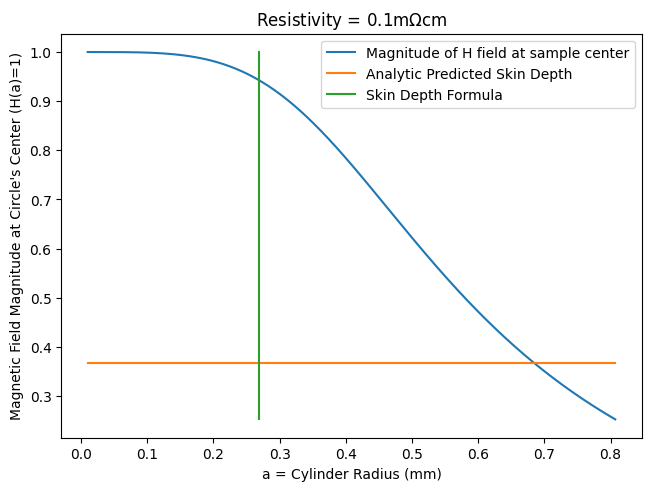

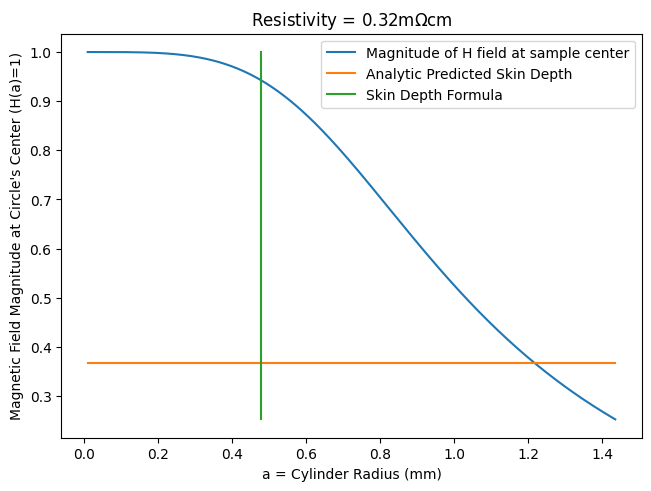

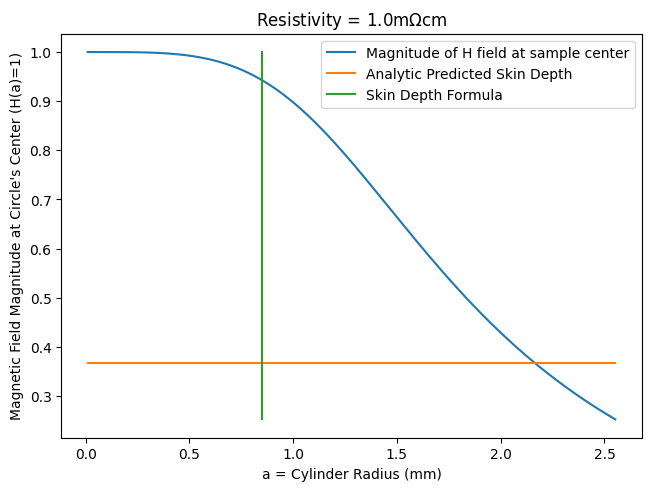

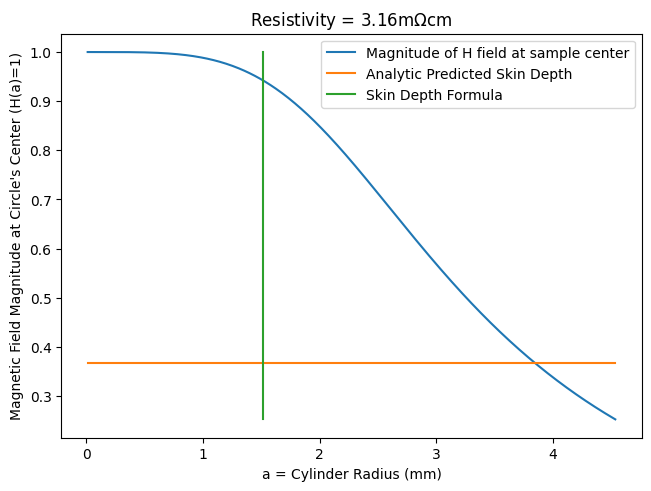

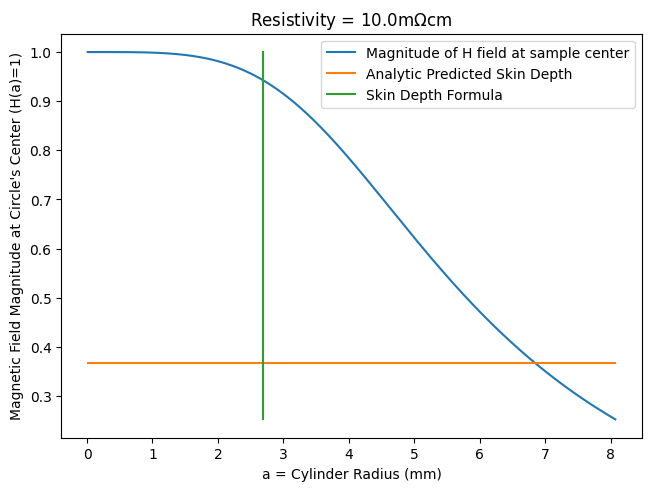

In [17]:
# Define the parameters
rhos = np.logspace(-6,-4,5)
resolution = 500
for rho in rhos:
    skin_depth = get_skin_depth(rho,frequency=3.5e6)
    rs = np.linspace(1e-5,3*skin_depth,resolution)
    Hcenter = np.zeros(resolution,dtype=np.complex128)

    for i,r in enumerate(rs):
        k = (1-1j)/skin_depth
        Hcenter[i] = jv(0,0)/jv(0,r*k)
    # find point where H center is 1/e, which means the radius is the skin depth
    print(np.interp(np.exp(-1),np.abs(Hcenter)[::-1],rs[::-1])/skin_depth)

    plot = True
    if plot:
        fig = plt.figure(constrained_layout = True)
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(1e3*rs,np.abs(Hcenter),label = 'Magnitude of H field at sample center')
        ax.plot(1e3*np.array([rs[0],rs[-1]]),[np.exp(-1),np.exp(-1)],label = 'Analytic Predicted Skin Depth')
        # ax.plot(1e3*np.array([rs[0],rs[-1]]),[1/np.abs(jv(0,(1-1j))),1/np.abs(jv(0,(1-1j)))],label = 'Magnetic Field at Skin Depth')
        ax.plot(1e3*np.array([skin_depth,skin_depth]),[np.abs(Hcenter)[0],np.abs(Hcenter)[-1]],label = 'Skin Depth Formula')
        
        ax.set_xlabel('a = Cylinder Radius (mm)')
        ax.set_ylabel("Magnetic Field Magnitude at Circle's Center (H(a)=1)")
        ax.set_title('Resistivity = '+str(round(rho*1e5,2))+r'm$\Omega$cm')
        # ax.set_xscale('log')
        # ax.set_yscale('log')       
        ax.legend()
# print(1/np.abs(jv(0,(1-1j))))
_ = 1